# Presented by: *Shivansh Sharma*

In [70]:
#print(sns.get_dataset_names())

In [71]:
#df=sns.load_dataset('planets')

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [73]:
df=pd.read_csv('iris1.csv')

In [74]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
bool_species=pd.get_dummies(df['species'])
bool_species

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [76]:
df.species=bool_species
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [77]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [78]:
import sweetviz

In [79]:
my_report=sweetviz.analyze([df, 'dataframe'], target_feat='species')

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [80]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [81]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=10)


In [83]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=5, criterion='gini')
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [84]:
y_pred=model.predict(X_train)
y_pred=model.predict(X_test)



In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[20,  0],
       [ 0, 10]], dtype=int64)

In [86]:
accuracy_score(y_test, y_pred)

1.0

Accuracy_score is 100% means our model is predicting perfectly.

Text(0.5, 1.0, 'Decision Tree')

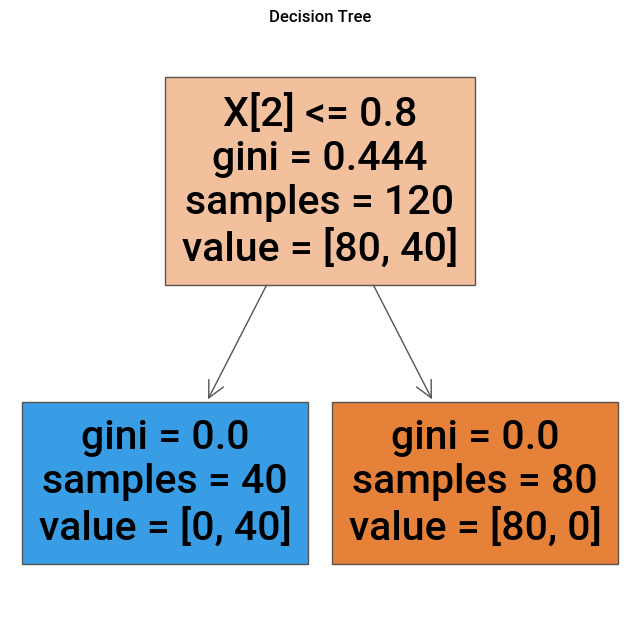

In [87]:
from sklearn import tree
plt.figure(figsize=(8,8))
tree.plot_tree(model, filled=True)
plt.title('Decision Tree')